# Data Mining project (Laundry dataset)

**QUESTION 1: Profiling Customers in a Self-Service Coin Laundry Shop** <br><br>

Group members: 
1. Yee Wen San (1181101326) <br>
2. Fiona Liou Shin Wee (1181100812) <br>
3. Denis Siow Chin Hsuen (1181100466)

In [79]:
## Setup environment, load the relevant libraries

#import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import altair as alt
import missingno as msno

import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
from scipy.stats import pearsonr
from collections import defaultdict
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

import imblearn
from imblearn.over_sampling import SMOTE

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from kmodes.kmodes import KModes

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rc("font", size=12)

# **Data Preprocessing**
There are total 807 rows and 20 columns for laundry dataset. First, we used the isna() function to check for missing values and replaced them with mode values because our data are categorical values, hence, remove null values or replacing it with average value is not suitable. It is also impossible to remove the rows with null values because the dataset was already small in size.

In [47]:
laundry = pd.read_csv("LaundryData.csv")
laundry

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,09/12/2015,20:05:46,malay,female,moderate,45.0,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,804,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,805,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,806,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no


In [48]:
# drop unwanted first column which is the index
df = laundry.copy()
df.drop(df.iloc[:,0:1], inplace=True, axis=1) 
df

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,09/12/2015,20:05:46,malay,female,moderate,45.0,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no


## Check for missing values

In [49]:
df.isna().sum()

Date              0
Time              0
Race             10
Gender           14
Body_Size        17
Age_Range         8
With_Kids        13
Kids_Category    30
Basket_Size       6
Basket_colour     9
Attire           31
Shirt_Colour      9
shirt_type       37
Pants_Colour      5
pants_type        9
Wash_Item        23
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64

<AxesSubplot:>

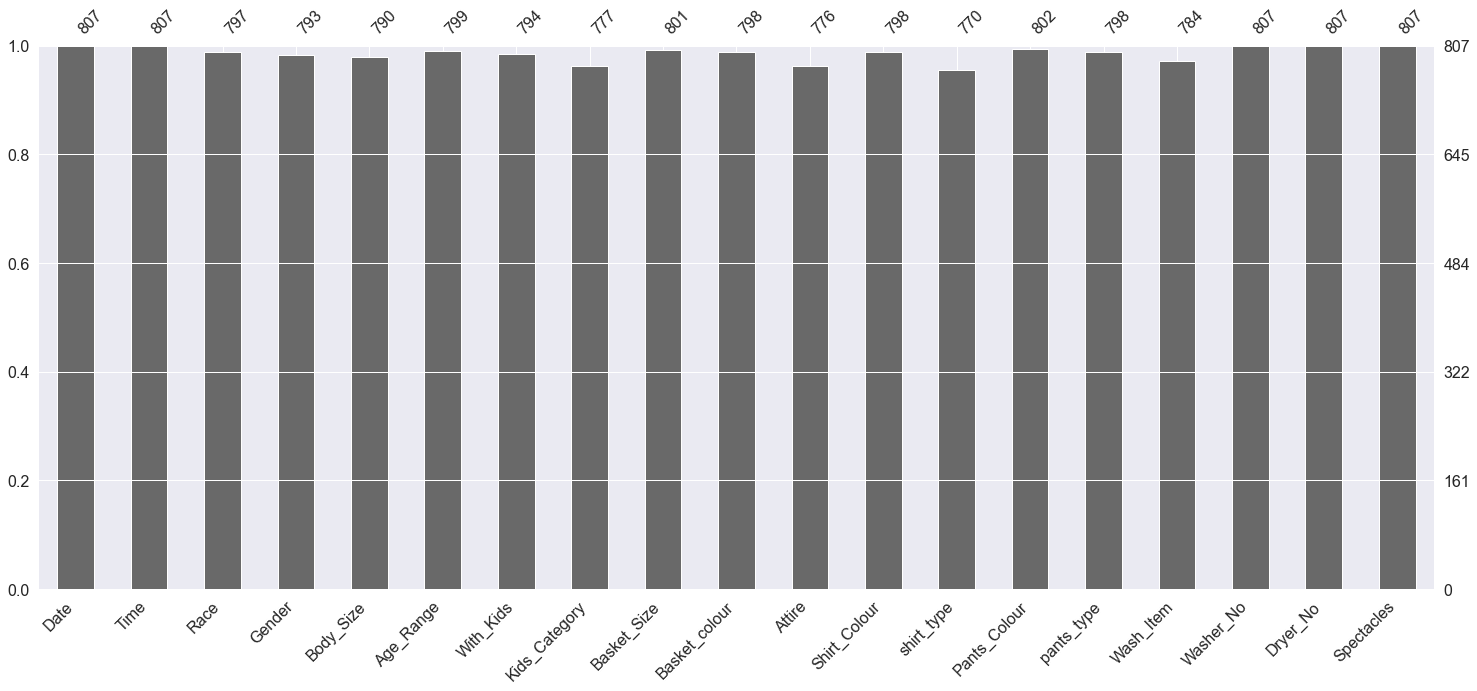

In [50]:
# check missing values
df.isna().sum()
msno.bar(df)

In [51]:
# fill all missing values with mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [52]:
df.isna().sum()

Date             0
Time             0
Race             0
Gender           0
Body_Size        0
Age_Range        0
With_Kids        0
Kids_Category    0
Basket_Size      0
Basket_colour    0
Attire           0
Shirt_Colour     0
shirt_type       0
Pants_Colour     0
pants_type       0
Wash_Item        0
Washer_No        0
Dryer_No         0
Spectacles       0
dtype: int64

<AxesSubplot:>

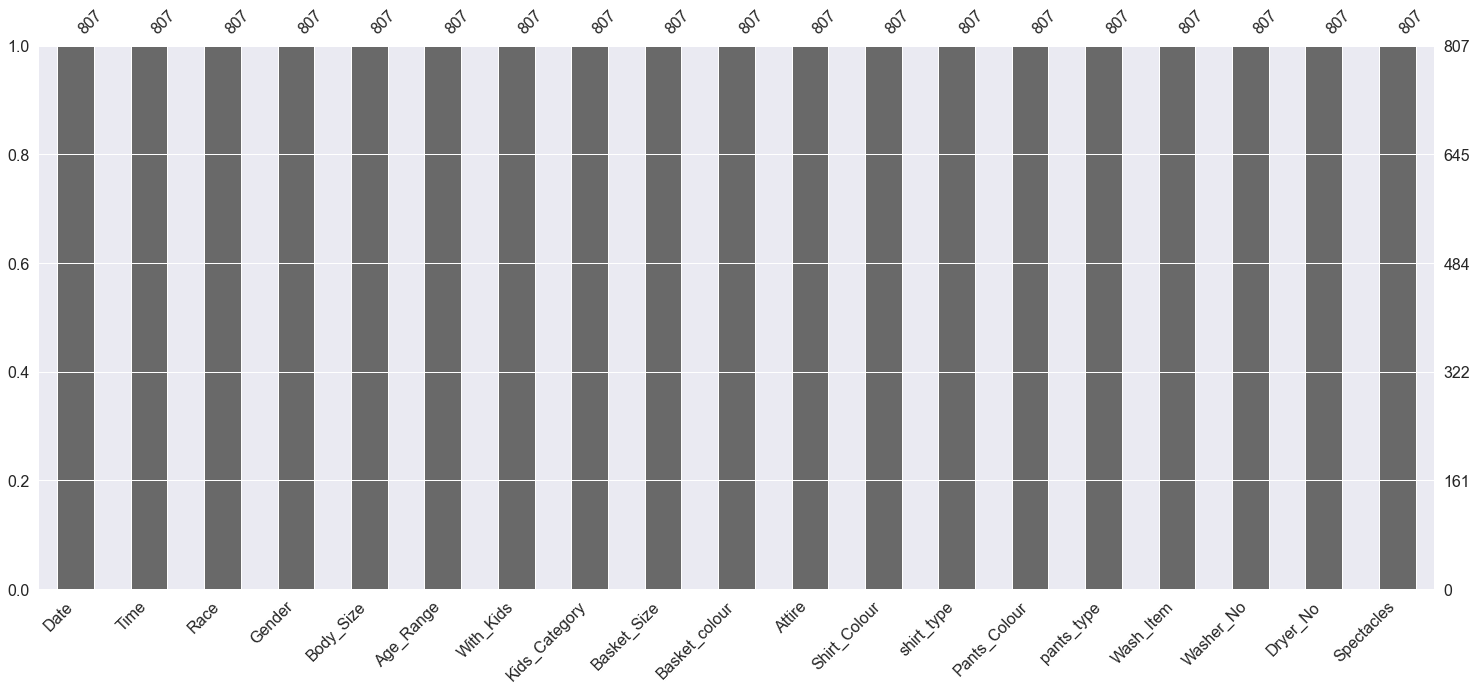

In [53]:
# check again missing values
df.isna().sum()
msno.bar(df)

## Data normalization
We replaced the semicolon in the "Time" column with the character colon and merge the "Date" and "Time" columns together, furthermore, renamed them to "Timestamp". Then, we extracted hours, minutes, and seconds from the "Timestamp" column and cut into bins to be categorized into 6 parts of a day. Besides, "Age\_Range" has also been categorized into 9 ranges.

Moreover, we standardized the "Shirt\_type" column by changing the "long sleeve" to "long\_sleeve" because the "short\_sleeve" was having an underscore symbol. In addition, for the "Pants\_Colour" column, all data with "blue\_jeans", "blue  ", and "blue " were all standardized as "blue" so that "Pants\_Colour" column only provides information of the pants colour. For the "Race" column, the white or blank spaces in the "foreigner " input were all removed and replaced with "foreigner".

In [54]:
# change wrong character
df.Time = df.Time.replace(";", ":", regex=True)

# change datatype for Date and merge both Date and Time
df['Date'] = pd.to_datetime(df['Date']+ ' ' + df['Time'])
df.rename(columns = {'Date':'Timestamp'}, inplace = True)

# drop time column
df.drop(df.iloc[:,1:2], inplace=True, axis=1) 

# get hour, min, sec from timestamp
df['Hour'] = df.Timestamp.dt.hour
df['Minutes'] = df.Timestamp.dt.minute
df['Seconds'] = df.Timestamp.dt.second

df["Parts_Of_The_Day"] = pd.cut(df["Hour"], bins=[-1,1,6,12,17,21,24], labels=["Midnight", "Early Morning", "Morning", "Afternoon", "Evening", "Night"])


In [55]:
# normalize noisy data

#shirt_type
df.shirt_type = df.shirt_type.replace("long sleeve", "long_sleeve", regex=True)

#Pants_Colour
df.Pants_Colour = df.Pants_Colour.replace("blue_jeans", "blue", regex=True)
df.Pants_Colour = df.Pants_Colour.replace("blue  ", "blue", regex=True)
df.Pants_Colour = df.Pants_Colour.replace("blue ", "blue", regex=True)
df.Pants_Colour = df.Pants_Colour.replace("black ", "black", regex=True)

#Race
df.Race = df.Race.replace("foreigner ", "foreigner", regex=True)

In [56]:
# cut the 'Age_Range' into bins
df['Age_Range'] = pd.cut(df['Age_Range'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                         labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [57]:
# rename column name shirt_type & pants_type
df.rename(columns={'shirt_type':'Shirt_type', 'pants_type': 'Pants_type'}, inplace = True)

In [58]:
df

,Timestamp,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,Shirt_type,Pants_Colour,Pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Hour,Minutes,Seconds,Parts_Of_The_Day
0,2015-10-19 20:17:50,malay,male,moderate,20-30,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,20,17,50,Evening
1,2015-10-19 20:28:42,indian,male,thin,30-40,no,no_kids,big,green,casual,white,short_sleeve,blue,long,clothes,6,9,no,20,28,42,Evening
2,2015-10-19 20:58:31,malay,female,moderate,20-30,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no,20,58,31,Evening
3,2015-10-19 21:31:28,indian,male,thin,50-60,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,21,31,28,Evening
4,2015-10-19 21:40:28,indian,male,moderate,30-40,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no,21,40,28,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2015-09-12 20:05:46,malay,female,moderate,40-50,no,no_kids,small,white,casual,red,long_sleeve,black,long,clothes,3,10,no,20,5,46,Evening
803,2015-09-12 20:33:01,malay,male,fat,30-40,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no,20,33,1,Evening
804,2015-09-12 20:37:01,malay,female,moderate,50-60,no,no_kids,big,purple,traditional,pink,long_sleeve,pink,long,clothes,3,7,yes,20,37,1,Evening
805,2015-09-12 20:42:57,indian,female,moderate,30-40,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no,20,42,57,Evening


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         807 non-null    datetime64[ns]
 1   Race              807 non-null    object        
 2   Gender            807 non-null    object        
 3   Body_Size         807 non-null    object        
 4   Age_Range         807 non-null    category      
 5   With_Kids         807 non-null    object        
 6   Kids_Category     807 non-null    object        
 7   Basket_Size       807 non-null    object        
 8   Basket_colour     807 non-null    object        
 9   Attire            807 non-null    object        
 10  Shirt_Colour      807 non-null    object        
 11  Shirt_type        807 non-null    object        
 12  Pants_Colour      807 non-null    object        
 13  Pants_type        807 non-null    object        
 14  Wash_Item         807 non-

In [60]:
df.to_csv("df.csv", index=False)

# **Dealing with imbalanced data (SMOTE)**
SMOTE was an oversampling technique used in this project to deal with the imbalanced data in the "LaundryData". We implemented oversampling technique because the undersampling technique will further reduce the size of data and make the dataset even smaller. 

Firstly, "Timestamp" column is dropped and all the values for the other columns in the data frame will be encoded with LabelEncoder(). After all the columns are encoded with a numeric value, the data was split into "X" and "y", two different data frames. "X" data frame includes all the columns except "Wash\_Item', "Hour', "Minutes' and "Seconds' while "y" data frame only includes "Wash\_Item" which is the target variable . After defining the "X" and "y", we fit them into SMOTE function.

Originally, the blankets(155) is less than the clothes(652). After applying SMOTE, both counts for blankets and clothes are now balanced. Now, we obtained a 1304 columns x 18 rows of data frame after data resampling.

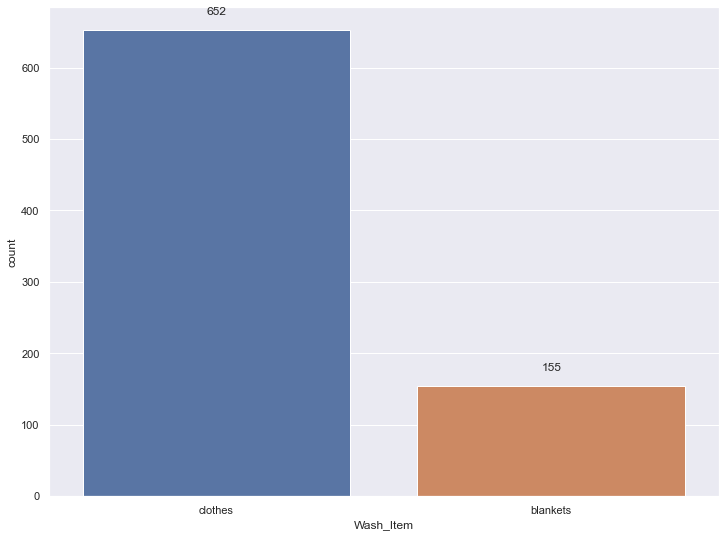

In [61]:
# target variable Wash_Item (imbalanced data)
a = sns.countplot(x='Wash_Item', data = df)

for p in a.patches:
    a.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    plt.savefig("imbalanced.png")

In [62]:
df1 = df.copy()
df1 = df1.drop('Timestamp', axis = 1)

dictionary = defaultdict(LabelEncoder)
df1 = df1.apply(lambda x: dictionary[x.name].fit_transform(x))

y = df1.Wash_Item
X = df1.drop(columns = ['Wash_Item', 'Hour', 'Minutes', 'Seconds'] , axis=1) 

In [63]:
# perform SMOTE 
smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=10, k_neighbors=5)
X_res, y_res = smt.fit_resample(X, y)
colnames = X_res.columns

dfsmote = pd.concat([X_res.reset_index(drop=True), y_res], axis=1) 
dfsmote = dfsmote.apply(lambda x: dictionary[x.name].inverse_transform(x))
dfsmote

,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,Shirt_type,Pants_Colour,Pants_type,Washer_No,Dryer_No,Spectacles,Parts_Of_The_Day,Wash_Item
0,malay,male,moderate,20-30,yes,young,big,red,casual,blue,short_sleeve,black,short,3,10,no,Evening,clothes
1,indian,male,thin,30-40,no,no_kids,big,green,casual,white,short_sleeve,blue,long,6,9,no,Evening,clothes
2,malay,female,moderate,20-30,no,no_kids,big,blue,casual,red,short_sleeve,black,long,4,10,no,Evening,clothes
3,indian,male,thin,50-60,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,5,9,no,Evening,clothes
4,indian,male,moderate,30-40,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,3,9,no,Evening,clothes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,malay,female,thin,30-40,yes,baby,big,black,formal,orange,short_sleeve,purple,long,4,8,no,Early Morning,blankets
1300,chinese,female,moderate,30-40,no,no_kids,big,black,casual,grey,long_sleeve,black,long,3,9,no,Early Morning,blankets
1301,chinese,female,moderate,50-60,no,no_kids,big,blue,casual,pink,short_sleeve,black,long,4,7,no,Morning,blankets
1302,chinese,female,moderate,40-50,no,no_kids,big,blue,casual,pink,short_sleeve,black,long,4,7,no,Morning,blankets


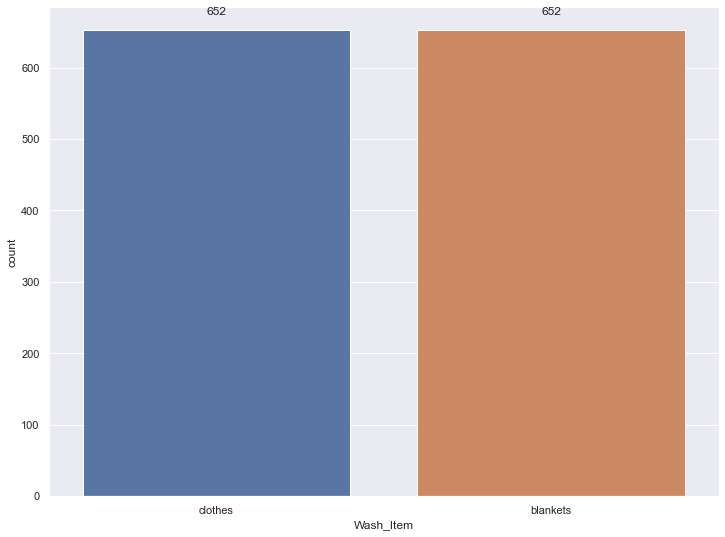

In [64]:
# target variable Wash_Item (balanced data)
b = sns.countplot(x='Wash_Item', data = dfsmote)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    plt.savefig("balanced.png")

# **Exploratory Data Analysis (EDA)**
This section displays the interesting patterns and relationships found in the dataset. There are a series of questions, which we found that it is interesting from the data.

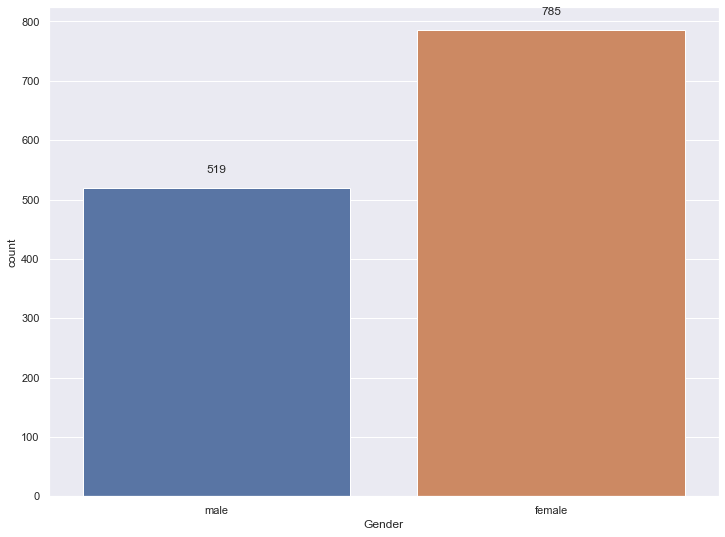

In [65]:
# Which gender visits the laundry shop the most?

gender = sns.countplot(x='Gender', data = dfsmote)

for p in gender.patches:
    gender.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    plt.savefig("gender.png")

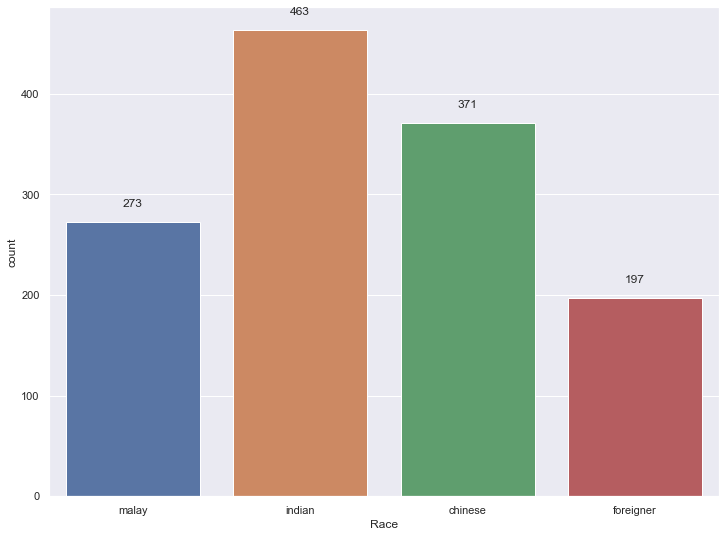

In [66]:
# Which race visits the laundry shop the most?

race = sns.countplot(x='Race', data = dfsmote)

#meant to write the exact number on the top of the bar
for p in race.patches:
    race.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    plt.savefig("race.png")

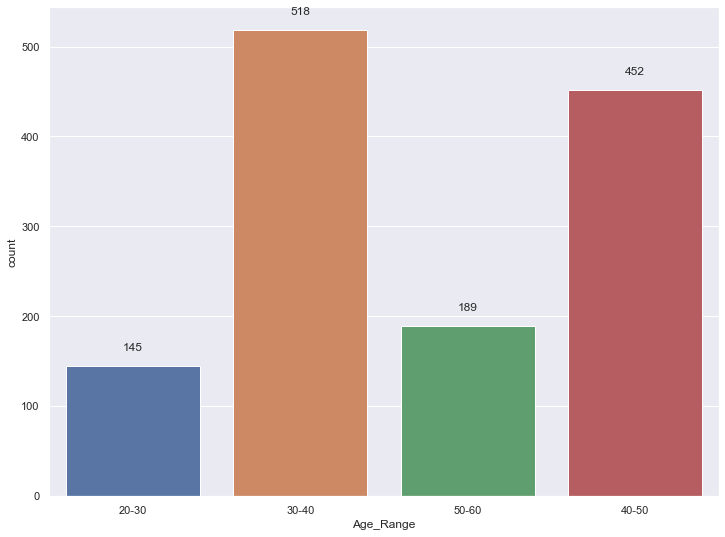

In [67]:
# Which age_range visits the laundry shop the most?

age = sns.countplot(x='Age_Range', data = dfsmote)

for p in age.patches:
    age.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    plt.savefig("age_range.png")

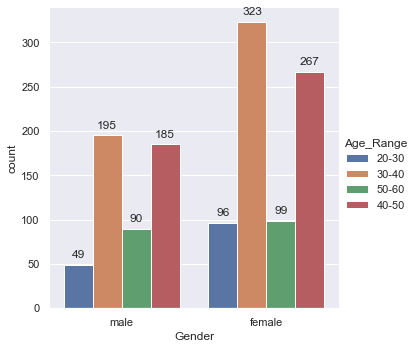

In [68]:
# Count the number of customers by gender and age_range

g = sns.catplot(x="Gender", hue="Age_Range", kind="count", data=dfsmote)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 10), textcoords = 'offset points')
    plt.savefig("age_gender.png")

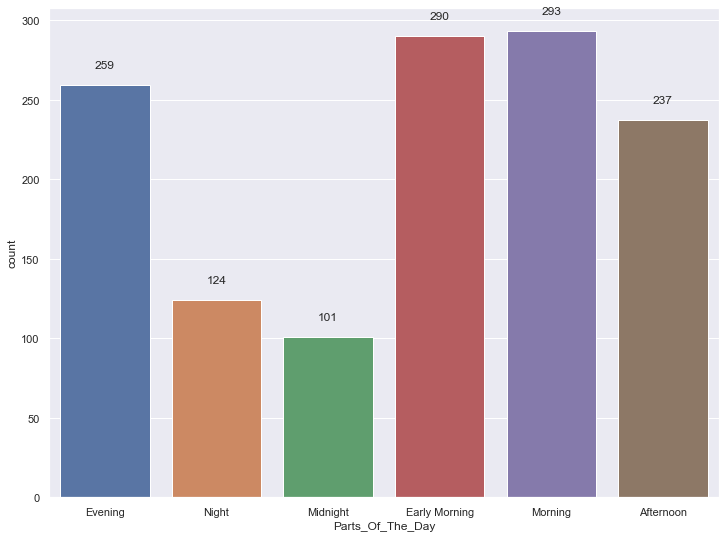

In [69]:
# Which time has the most customers visiting the laundry shop?

time = sns.countplot(x='Parts_Of_The_Day', data = dfsmote)

for p in time.patches:
    time.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0,
    xytext=(0, 20), textcoords='offset points')
    plt.savefig("time.png")

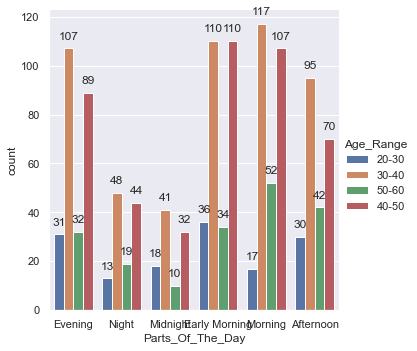

In [70]:
# Count the number of customers by parts_of_the_day and age_range

day_age = sns.catplot(x="Parts_Of_The_Day", hue="Age_Range", kind="count", data=dfsmote)

ax = day_age.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 12), textcoords = 'offset points')
    plt.savefig("day_age.png")

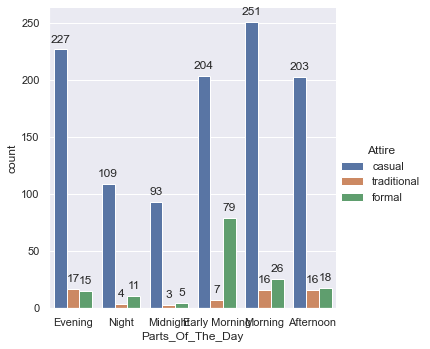

In [71]:
# Count the number of customers by parts_of_the_day and attire

day_attire = sns.catplot(x="Parts_Of_The_Day", hue="Attire", kind="count", data=dfsmote)

ax = day_attire.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 10), textcoords = 'offset points')
    plt.savefig("day_attire.png")

In [72]:
# Is there any relationship between basket size and race?

# cross tabulation between Basket_Size and Race
CrosstabResult=pd.crosstab(index=dfsmote['Race'],columns=dfsmote['Basket_Size'])
print(CrosstabResult)
CrosstabResult.to_csv("chisq.csv")

from scipy.stats import chi2_contingency
 
# perform Chi-square test
chiSq = chi2_contingency(CrosstabResult)
print(" ")

# p-value
print('P-Value of Chi-square Test:', chiSq[1])

Basket_Size  big  small
Race                   
chinese      361     10
foreigner    190      7
indian       440     23
malay        252     21
 
P-Value of Chi-square Test: 0.023555420081755887


#### Explanation: 

P-Value is the probability of H0 being True. Only if P-Value>0.05, we accept the assumption(H0). <br>

H0: Basket_Size and Race are not correlated with each other. This is the H0 used in the Chi-square test. <br>

If two variables are correlated, then the P-value will come very close to zero. From the above calculation, the P-value is lower than 0.05. Hence, H0 will be rejected. Which means the two variables (Basket_Size and Race) are correlated with each other.

In [73]:
# What types of customers will likely to choose Washer No. 3 and Dryer No. 7? 

dfcompare = dfsmote.copy()
dfcompare.drop(dfcompare[dfcompare['Washer_No'] != 3].index, axis=0, inplace = True)
dfcompare.drop(dfcompare[dfcompare['Dryer_No'] != 7].index, axis=0, inplace = True)
dfcompare= dfcompare.reset_index(drop=True)

dfcompare.groupby(['Gender', 'Wash_Item']).sum()

Washer_No  Dryer_No
Gender Wash_Item                     
female blankets         402       938
       clothes           84       196
male   blankets         108       252
       clothes           93       217

# **Feature Selection**
For feature selection, Boruta and Recursive Feature Elimination (RFE) algorithms are used to study the importance of features in the dataset.

Since we have to predict the wash item that customers brought to the laundry shop to wash, "Wash\_Item" will be the target variable, while the other features become the independent variables. As a result, the feature "Spectacles" had the lowest ranking with a 0.0 score was removed from the dataset.

In [19]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

## BORUTA

In [20]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, random_state=1)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector.fit(X_res.values, y_res.values.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [21]:
print('---------Top 5----------')
display(boruta_score.head(5))

print('---------Bottom 5----------')
display(boruta_score.tail(5))

---------Top 5----------


,Features,Score
0,Race,1.0
1,Gender,1.0
14,Dryer_No,1.0
13,Washer_No,1.0
12,Pants_type,1.0


---------Bottom 5----------


,Features,Score
4,With_Kids,1.0
3,Age_Range,1.0
2,Body_Size,1.0
16,Parts_Of_The_Day,1.0
15,Spectacles,0.0


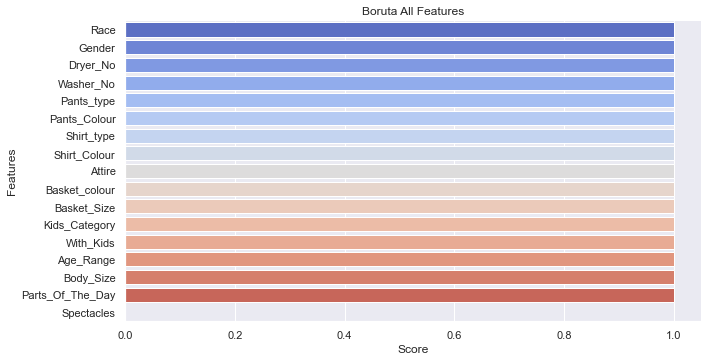

In [22]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:20], kind = "bar", 
               height=5, aspect=2, palette='coolwarm')
plt.title("Boruta All Features")
plt.savefig("Boruta.png")

In [23]:
boruta_score.to_csv("boruta_score.csv")

## RFE

In [24]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X_res, y_res)
rfe = RFECV(rf, min_features_to_select=1, cv=3)

In [25]:
rfe.fit(X_res, y_res)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [26]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [27]:
print('---------Top 5----------')
display(rfe_score.head(5))

print('---------Bottom 5----------')
display(rfe_score.tail(5))

---------Top 5----------


,Features,Score
0,Race,1.0
1,Gender,1.0
14,Dryer_No,1.0
13,Washer_No,1.0
12,Pants_type,1.0


---------Bottom 5----------


,Features,Score
4,With_Kids,1.0
3,Age_Range,1.0
2,Body_Size,1.0
16,Parts_Of_The_Day,1.0
15,Spectacles,0.0


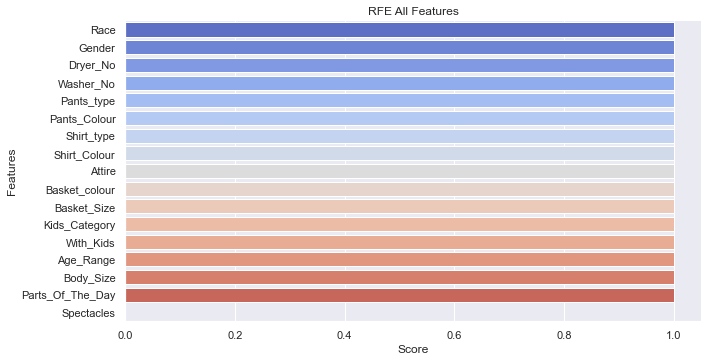

In [28]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:30], kind = "bar", 
               height=5, aspect=2, palette='coolwarm')
plt.title("RFE All Features")
plt.savefig("RFE.png")

In [29]:
rfe_score.to_csv("rfe_score.csv")

## Remove low ranking features

In [30]:
X_res.drop(columns=["Spectacles"], axis = 1, inplace = True)

# **Association Rule Mining**
We performed association rule mining on the attire of the customers who visited the laundry shop. The reason for that is to investigate what combination of outfits the customers will always wear when they visit the laundry shop. It observes the outfits that are frequently worn by customers together and calculates their strength of relations. 

In [41]:
df2 = df1.copy()
df2.drop(axis = 1, inplace = True, columns = ['Race', 'Gender', 'Age_Range', 'With_Kids', 'Kids_Category', 'Washer_No', 'Dryer_No', 'Wash_Item', 'Hour', 'Minutes', 'Seconds'])
df2 = df2.apply(lambda x: dictionary[x.name].inverse_transform(x))
df2_dummy = pd.get_dummies(df2)

In [42]:
arm = apriori(df2_dummy, min_support = 0.5, use_colnames = True)
rules = association_rules(arm, metric="lift", min_threshold=1)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules[(rules['confidence'] > 0.5) & (rules['antecedent_len'] <= 2) & (rules['consequent_len'] <= 2)].nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
9,"(Shirt_type_short_sleeve, Basket_Size_big)",(Attire_casual),0.736059,0.799257,0.644362,0.875421,1.095294,0.056062,1.611373,2,1
12,(Attire_casual),"(Shirt_type_short_sleeve, Basket_Size_big)",0.799257,0.736059,0.644362,0.806202,1.095294,0.056062,1.361933,1,2
39,"(Spectacles_no, Attire_casual)","(Shirt_type_short_sleeve, Basket_Size_big)",0.657993,0.736059,0.526642,0.800377,1.087380,0.042320,1.322193,2,2
38,"(Shirt_type_short_sleeve, Basket_Size_big)","(Spectacles_no, Attire_casual)",0.736059,0.657993,0.526642,0.715488,1.087380,0.042320,1.202085,2,2
10,"(Basket_Size_big, Attire_casual)",(Shirt_type_short_sleeve),0.749690,0.799257,0.644362,0.859504,1.075380,0.045167,1.428821,2,1
11,(Shirt_type_short_sleeve),"(Basket_Size_big, Attire_casual)",0.799257,0.749690,0.644362,0.806202,1.075380,0.045167,1.291599,1,2
2,(Shirt_type_short_sleeve),(Attire_casual),0.799257,0.799257,0.686493,0.858915,1.074642,0.047682,1.422852,1,1
3,(Attire_casual),(Shirt_type_short_sleeve),0.799257,0.799257,0.686493,0.858915,1.074642,0.047682,1.422852,1,1
28,"(Spectacles_no, Attire_casual)",(Shirt_type_short_sleeve),0.657993,0.799257,0.562577,0.854991,1.069732,0.036673,1.384348,2,1
29,(Shirt_type_short_sleeve),"(Spectacles_no, Attire_casual)",0.799257,0.657993,0.562577,0.703876,1.069732,0.036673,1.154947,1,2


# **Machine Learning Techniques**
In this project, we implemented multiple classification models which are Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Logistic Regression (LR), and Naive Bayes (NB). We also implemented 2 regression models, which are linear regression and Lasso regression. These 6 models are used to predict the wash items that the customers bring to the laundry shop based on their characteristics and attire.

## Classification Models

## Support Vector Machine (SVM)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)

In [37]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    print("Kernel: " + str(kernel))
    clf = svm.SVC(kernel=kernel, gamma='auto', random_state = 1, probability=True)

    # train the model using the training sets
    clf.fit(X_train, y_train)

    # predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # use model to predict probability that given y value is 1
    proba_SVM = clf.predict_proba(X_test)[::,1]

    # create confusion matrix table
    cm = confusion_matrix(y_test, y_pred)

    # get f1-score for evaluation
    f1_SVM = metrics.f1_score(y_test, y_pred)

    # compute ROC curve and area the curve
    fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, proba_SVM)
    
    if (kernel == 'rbf'):
        f1_SVM = metrics.f1_score(y_test, y_pred)
    
    print('Confusion Matrix Table\n', cm)
    print('***************************')
    print('True Negative (TN)= ', cm[0][0])
    print('False Postive (FP)=', cm[0][1])
    print('False Negative (FN)= ', cm[1][0])
    print('True Positive (TP)= ', cm[1][1])
    print('***************************')
    print(" ")
    print('AUC= {:.2f}'. format(roc_auc_score(y_test, proba_SVM)))
    print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
    print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
    print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
    print("\n")
    
    

Kernel: linear
Confusion Matrix Table
 [[149  47]
 [ 64 132]]
***************************
True Negative (TN)=  149
False Postive (FP)= 47
False Negative (FN)=  64
True Positive (TP)=  132
***************************
 
AUC= 0.79
Accuracy= 0.72
Precision= 0.74
Recall= 0.67
F1= 0.70


Kernel: rbf
Confusion Matrix Table
 [[171  25]
 [ 39 157]]
***************************
True Negative (TN)=  171
False Postive (FP)= 25
False Negative (FN)=  39
True Positive (TP)=  157
***************************
 
AUC= 0.91
Accuracy= 0.84
Precision= 0.86
Recall= 0.80
F1= 0.83


Kernel: poly
Confusion Matrix Table
 [[170  26]
 [ 44 152]]
***************************
True Negative (TN)=  170
False Postive (FP)= 26
False Negative (FN)=  44
True Positive (TP)=  152
***************************
 
AUC= 0.88
Accuracy= 0.82
Precision= 0.85
Recall= 0.78
F1= 0.81




In [38]:
# kernel = rbf 
clf = svm.SVC(kernel='rbf', gamma='auto', random_state = 1, probability=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
proba_SVM = clf.predict_proba(X_test)[::,1]

f1_SVM = metrics.f1_score(y_test, y_pred)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, proba_SVM)

## K-Nearest Neighbor (KNN)

Number of K: 1
Confusion Matrix Table
 [[188   8]
 [ 48 148]]
***************************
True Negative (TN)=  188
False Postive (FP)= 8
False Negative (FN)=  48
True Positive (TP)=  148
***************************
 
AUC= 0.86
Accuracy= 0.86
Precision= 0.95
Recall= 0.76
F1= 0.84


Number of K: 2
Confusion Matrix Table
 [[193   3]
 [ 84 112]]
***************************
True Negative (TN)=  193
False Postive (FP)= 3
False Negative (FN)=  84
True Positive (TP)=  112
***************************
 
AUC= 0.90
Accuracy= 0.78
Precision= 0.97
Recall= 0.57
F1= 0.72


Number of K: 3
Confusion Matrix Table
 [[187   9]
 [ 64 132]]
***************************
True Negative (TN)=  187
False Postive (FP)= 9
False Negative (FN)=  64
True Positive (TP)=  132
***************************
 
AUC= 0.90
Accuracy= 0.81
Precision= 0.94
Recall= 0.67
F1= 0.78


Number of K: 4
Confusion Matrix Table
 [[192   4]
 [ 84 112]]
***************************
True Negative (TN)=  192
False Postive (FP)= 4
False Negative (F

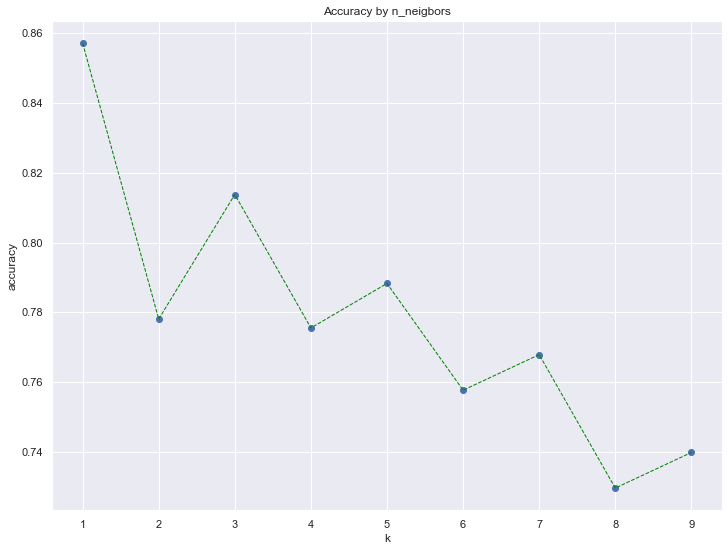

In [74]:
k_range = range(1,10)
scores = []

for k in k_range:
    print("Number of K: " + str(k))
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    y_pred = knn.predict(X_test)
    
    # use model to predict probability that given y value is 1
    proba_KNN = knn.predict_proba(X_test)[::,1]

    # create confusion matrix table
    cm = confusion_matrix(y_test, y_pred)

    # get f1-score for evaluation
    f1_KNN = metrics.f1_score(y_test, y_pred)

    # compute ROC curve and area the curve
    fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, proba_KNN)
    
    if (k == 3):
        f1_KNN = metrics.f1_score(y_test, y_pred)
        
    print('Confusion Matrix Table\n', cm)
    print('***************************')
    print('True Negative (TN)= ', cm[0][0])
    print('False Postive (FP)=', cm[0][1])
    print('False Negative (FN)= ', cm[1][0])
    print('True Positive (TP)= ', cm[1][1])
    print('***************************')
    print(" ")
    print('AUC= {:.2f}'. format(roc_auc_score(y_test, proba_KNN)))
    print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
    print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
    print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
    print("\n")
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.plot(k_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)

In [76]:
# k=3
knn = KNeighborsClassifier(n_neighbors = 3, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
proba_KNN = knn.predict_proba(X_test)[::,1]

f1_KNN = metrics.f1_score(y_test, y_pred)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, proba_KNN)

## Logistic Regression (LR)

In [41]:
logreg = LogisticRegression(solver='lbfgs', max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# use model to predict probability that given y value is 1
proba_LR = logreg.predict_proba(X_test)[::,1]

# create confusion matrix table
cm = confusion_matrix(y_test, y_pred)

# get f1-score for evaluation
f1_LR = metrics.f1_score(y_test, y_pred)

# compute ROC curve and area the curve
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, proba_LR)

In [42]:
print('Confusion Matrix Table\n', cm)
print('***************************')
print('True Negative (TN)= ', cm[0][0])
print('False Postive (FP)= ', cm[0][1])
print('False Negative (FN)= ', cm[1][0])
print('True Positive (TP)= ', cm[1][1])
print('***************************')
print(" ")
print('AUC= {:.2f}'. format(roc_auc_score(y_test, proba_LR)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print("\n")

Confusion Matrix Table
 [[143  53]
 [ 63 133]]
***************************
True Negative (TN)=  143
False Postive (FP)=  53
False Negative (FN)=  63
True Positive (TP)=  133
***************************
 
AUC= 0.80
Accuracy= 0.70
Precision= 0.72
Recall= 0.68
F1= 0.70




## Naive Bayes (NB)

In [43]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# use model to predict probability that given y value is 1
proba_NB = nb.predict_proba(X_test)[::,1]

# create confusion matrix table
cm = confusion_matrix(y_test, y_pred)

# get f1-score for evaluation
f1_NB = metrics.f1_score(y_test, y_pred)

# compute ROC curve and area the curve
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, proba_NB)

In [44]:
print('Confusion Matrix Table\n', cm)
print('***************************')
print('True Negative (TN)= ', cm[0][0])
print('False Postive (FP)=', cm[0][1])
print('False Negative (FN)= ', cm[1][0])
print('True Positive (TP)= ', cm[1][1])
print('***************************')
print(" ")
print('AUC= {:.2f}'. format(roc_auc_score(y_test, proba_NB)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print("\n")

Confusion Matrix Table
 [[167  29]
 [115  81]]
***************************
True Negative (TN)=  167
False Postive (FP)= 29
False Negative (FN)=  115
True Positive (TP)=  81
***************************
 
AUC= 0.77
Accuracy= 0.63
Precision= 0.74
Recall= 0.41
F1= 0.53




## Regression Models

## Linear Regression

In [82]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result)

print(" ")
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred))
print('R-square score: %.3f' % r2_score(y_test, y_pred))

      Actual  Predicted
644        1   0.388625
1032       0   0.172008
163        1   0.428732
1009       0   0.151783
909        0   0.630852
...      ...        ...
191        1   0.328631
348        1   0.111226
306        1   0.165885
516        1   0.603618
987        0   0.564483

[392 rows x 2 columns]
 
Mean Absolute Error: 0.373
Mean Squared Error: 0.189
R-square score: 0.244


## Lasso Regression

In [81]:
lassoM = linear_model.Lasso(alpha=1.0,normalize=True, max_iter=1e5)
lassoM.fit(X_train, y_train)

y_pred = lassoM.predict(X_test)

result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})  
print (result)

print(" ")
print('Mean Absolute Error: %.3f' % mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred))
print('R-square score: %.3f' % r2_score(y_test, y_pred))

      Actual  Predicted
644        1        0.5
1032       0        0.5
163        1        0.5
1009       0        0.5
909        0        0.5
...      ...        ...
191        1        0.5
348        1        0.5
306        1        0.5
516        1        0.5
987        0        0.5

[392 rows x 2 columns]
 
Mean Absolute Error: 0.500
Mean Squared Error: 0.250
R-square score: 0.000


</br>Explanation: </br>
Among these 2 regression model, we can see that the Linear Regression Model has a lower MAE and MSE than the Lasso Regression Model. MAE indicate the average of the absolute error between the actual and predicted values in the dataset while the MSE represent the average of the squared error between the actual and predicted values in the dataset. 

Therefore, a lower MAE and MSE value indicates that a regression model is more accurate. Moreover, the higher the $R^{2}$ score, the better the model. Hence, we can conclude that the Linear Regression model provided a better results in this project.

## Classification Model Evaluation

Text(0.5, 1.0, 'F1-score of classification models')

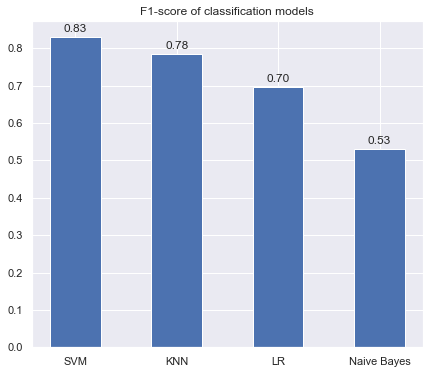

In [77]:
scores = {'SVM': f1_SVM, 'KNN': f1_KNN, 'LR': f1_LR, 'Naive Bayes': f1_NB}
model = list(scores.keys())
score = list(scores.values())

plt.figure(figsize=(7,6))
plt.bar(model, score, width=0.5)
for x,y in zip(model,score):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5),
                 ha='center')
    plt.savefig("F1score.png")

plt.title("F1-score of classification models")

## Compare the 5 classifiers

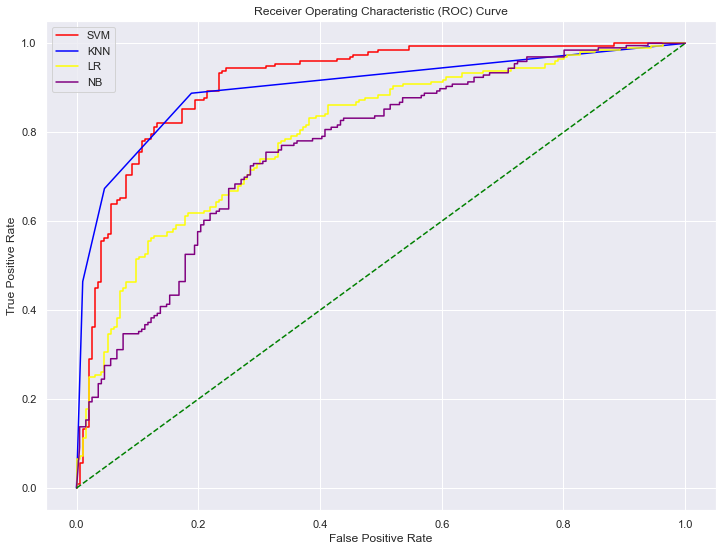

In [78]:
plt.plot(fpr_SVM, tpr_SVM, color='red', label='SVM')
plt.plot(fpr_KNN, tpr_KNN, color='blue', label='KNN')
plt.plot(fpr_LR, tpr_LR, color='yellow', label='LR')
plt.plot(fpr_NB, tpr_NB, color='purple', label='NB')

plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig("ROC.png")

## Clustering Analysis (KMode)
We performed K-modes clustering since the dataset is categorical data. K-modes clustering defines clusters based on the number of matching categories between the data points. The Elbow Method is used to determine the optimal number of clusters.

In [56]:
df3 = pd.concat([X_res.reset_index(drop=True), y_res], axis=1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10451.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 326, cost: 9529.0
Run 1, iteration: 2/100, moves: 96, cost: 9529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 290, cost: 9058.0
Run 1, iteration: 2/100, moves: 118, cost: 9025.0
Run 1, iteration: 3/100, moves: 30, cost: 9025.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 350, cost: 8871.0
Run 1, iteration: 2/100, moves: 68, cost: 8871.0


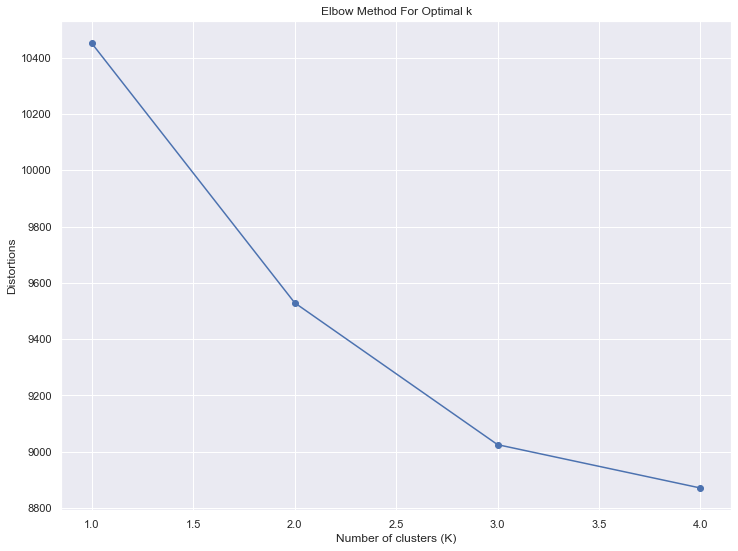

In [57]:
distortions = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "huang", n_init = 1, verbose=1)
    kmode.fit_predict(df3)
    distortions.append(kmode.cost_)

y = np.array([i for i in range(1,5,1)])
plt.plot(y, distortions, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig("k_elbow3.png")

In [58]:
#Chosen cluster = 3, because it is the elbow
km = KModes(n_clusters=3, init = "huang", n_init = 1, verbose=1)
clusters = km.fit_predict(df3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 392, cost: 8991.0


In [59]:
df3 = df3.apply(lambda x: dictionary[x.name].inverse_transform(x))

In [60]:
clusters_df = pd.DataFrame(clusters)
clusters_df.columns = ['Cluster']
df4 = pd.concat([df3, clusters_df], axis = 1).reset_index()
df4 = df4.drop(df4.columns[0],axis=1)

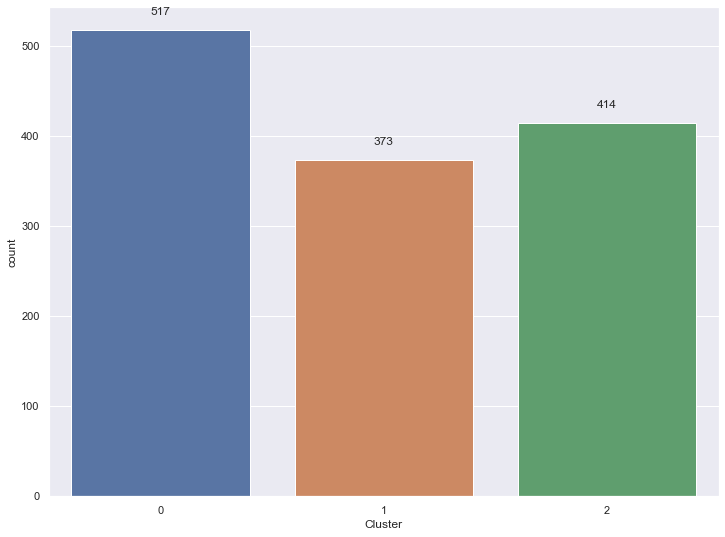

In [61]:
c = sns.countplot(x='Cluster', data = df4)

for p in c.patches:
    c.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    plt.savefig("cluster.png")

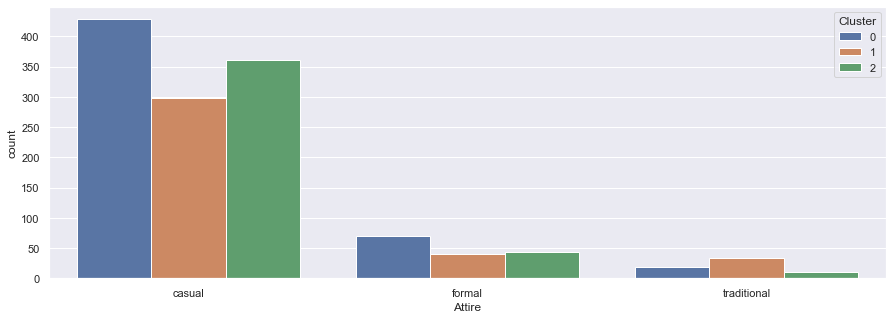

In [69]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Attire'], order=df4['Attire'].value_counts().index, hue=df4['Cluster'])
plt.savefig("cluster1.png")
plt.show()

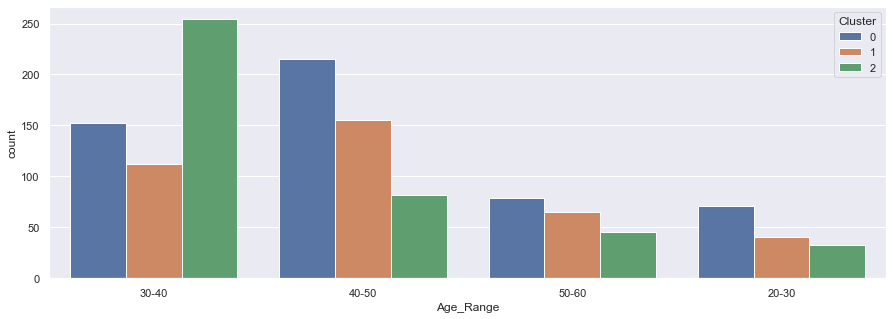

In [70]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Age_Range'], order=df4['Age_Range'].value_counts().index, hue=df4['Cluster'])
plt.savefig("cluster2.png")
plt.show()